### Loading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
print("hello")

hello


In [3]:
df = pd.read_csv("./datasets/train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1 -Declare col types first

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
categorical_cols = ['Survived', 'Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']
numerical_cols = ['Age', 'Fare']
mixed = ['Name', 'Ticket', 'Cabin']

### 2 - Univariate Analysis

#### Age

**Conclusion** 
- Age is near normal distributed
- almost 20% of values are missing
- some outlier (>65) but these values actually exist and are valid

In [7]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

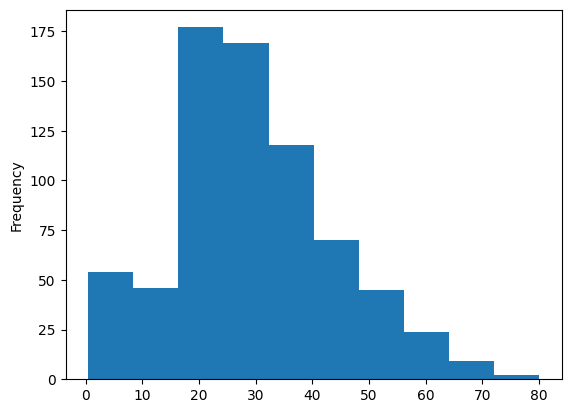

In [8]:
df['Age'].plot(kind="hist")

<Axes: ylabel='Density'>

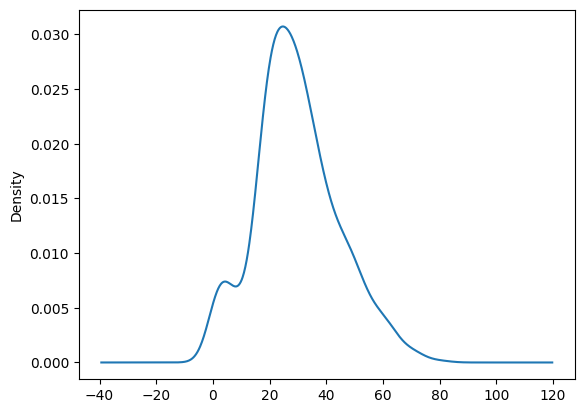

In [9]:
df['Age'].plot(kind='kde')

In [10]:
df['Age'].skew() # if near 0 then its near normal, more postive then skewness. normal is good.

np.float64(0.38910778230082704)

<Axes: >

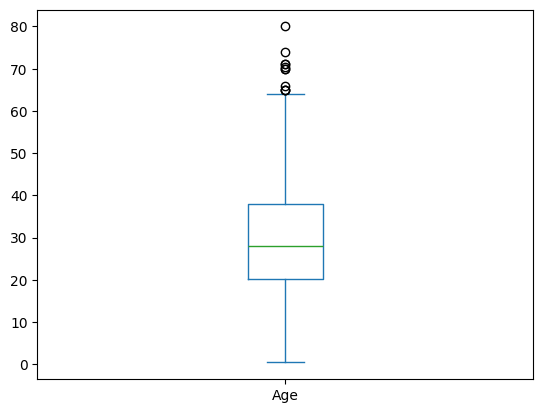

In [11]:
df['Age'].plot(kind="box")

In [12]:
df[df['Age']>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [14]:
df['Age'].isnull().sum()/len(df['Age']) # % of missing values

np.float64(0.19865319865319866)

#### Fare

**Conclusion**
- data is highly (postive) skewed
- no missing data
- fare is group fare and not individual fare so we need to create a new Feature for Individual Fare.

In [15]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

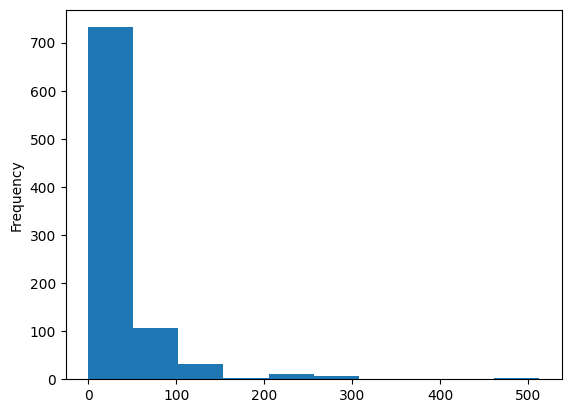

In [16]:
df["Fare"].plot(kind="hist")

<Axes: >

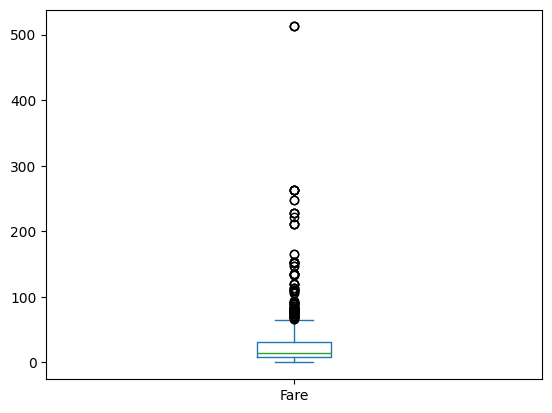

In [17]:
df["Fare"].plot(kind="box")

In [ ]:
df["Fare"].skew() # data is skewed

np.float64(4.787316519674893)

In [19]:
df["Fare"].isnull().sum()/len(df["Fare"])

np.float64(0.0)

In [20]:
df[df["Fare"]>200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


#### For Categorical Cols - univarate analysis

#### Survived

**Conclusion**

In [21]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

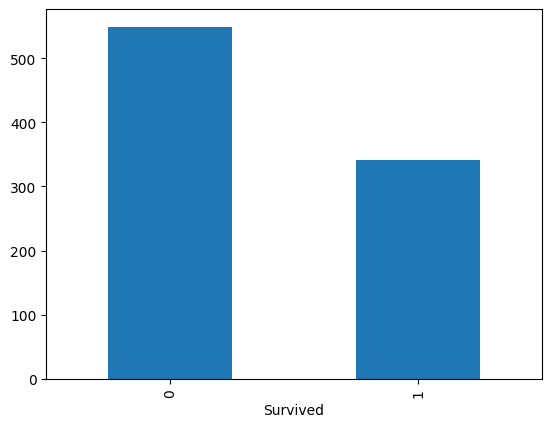

In [23]:
df["Survived"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

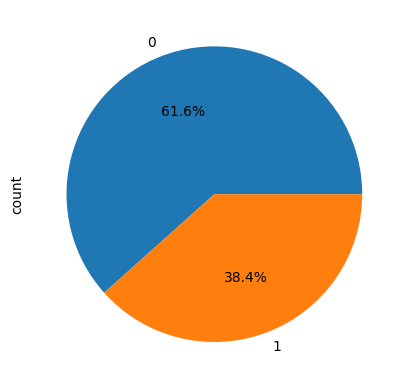

In [26]:
df["Survived"].value_counts().plot(kind="pie", autopct='%0.1f%%')

In [27]:
df["Survived"].isnull().sum()

np.int64(0)

<Axes: xlabel='Pclass'>

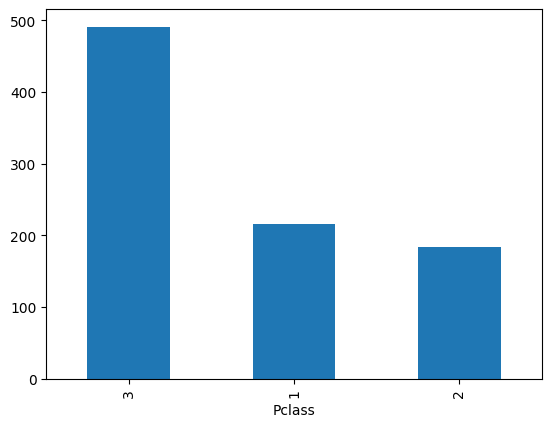

In [28]:
df['Pclass'].value_counts().plot(kind="bar")

Ideally, in class 1 people should be less than 2 and 3 but here we have more people in 1 than 2. This is bit doubtful.

<Axes: xlabel='Sex'>

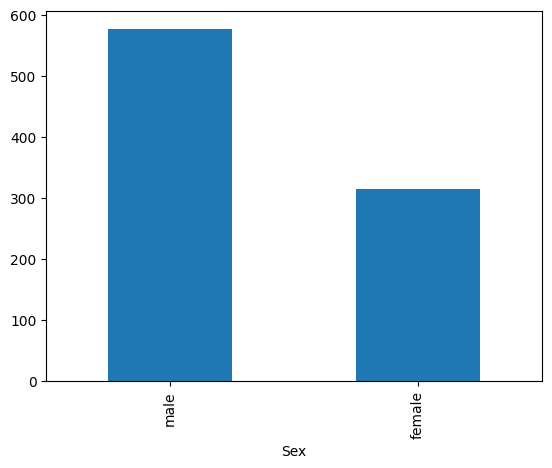

In [29]:
df["Sex"].value_counts().plot(kind="bar")

In [30]:
df["Sex"].isnull().sum()

np.int64(0)

<Axes: xlabel='Embarked'>

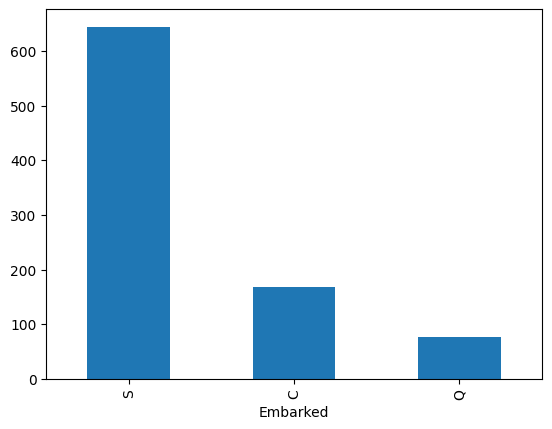

In [31]:
df["Embarked"].value_counts().plot(kind="bar")

In [32]:
df['Embarked'].isnull().sum()

np.int64(2)

<Axes: xlabel='SibSp'>

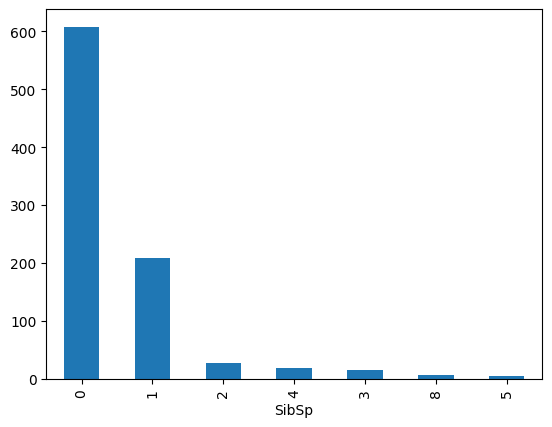

In [33]:
df["SibSp"].value_counts().plot(kind="bar")

In [34]:
df["SibSp"].isnull().sum()

np.int64(0)

<Axes: xlabel='Parch'>

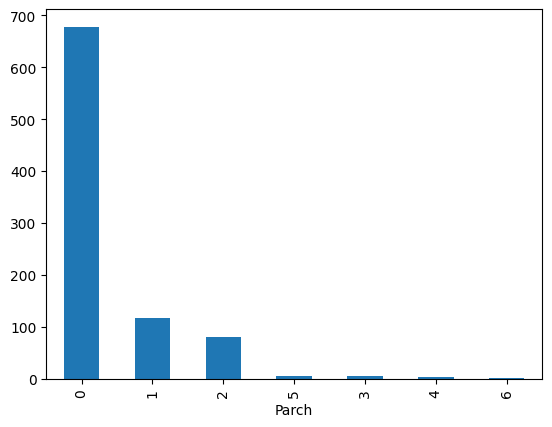

In [35]:
df["Parch"].value_counts().plot(kind="bar")

In [36]:
df["Parch"].isnull().sum()

np.int64(0)

**Conclusion**
- Parch & Sibsp can be merged into one - Family Size
- Lot of people are travelling alone so we can also have a col - Alone (0 or 1)

### Bivariate Analysis

In [ ]:
pd.crosstab(df["Survived"], df["Pclass"], normalize="columns")

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


<Axes: xlabel='Pclass', ylabel='Survived'>

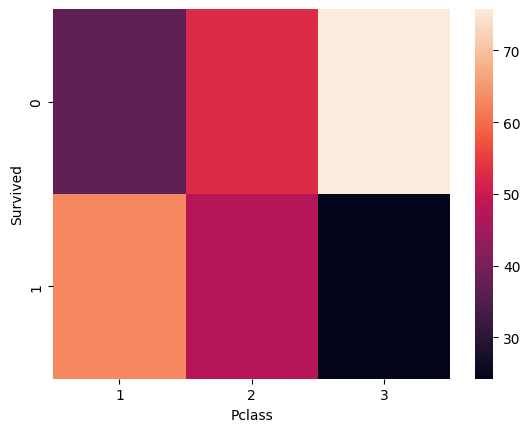

In [41]:
sns.heatmap(pd.crosstab(df["Survived"], df["Pclass"], normalize="columns")*100)

In [42]:
pd.crosstab(df["Survived"], df["Sex"], normalize="columns")

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


In [43]:
pd.crosstab(df["Survived"], df["Embarked"], normalize="columns")

Embarked,C,Q,S
Survived,,,
0,0.446429,0.61039,0.663043
1,0.553571,0.38961,0.336957


In [45]:
pd.crosstab(df["Pclass"], df["Embarked"], normalize="columns")

Embarked,C,Q,S
Pclass,,,
1,0.505952,0.025974,0.197205
2,0.101190,0.038961,0.254658
3,0.392857,0.935065,0.548137


In [46]:
pd.crosstab(df["Sex"], df["Embarked"], normalize="columns")

Embarked,C,Q,S
Sex,,,
female,0.434524,0.467532,0.315217
male,0.565476,0.532468,0.684783


#### for numerical data bivariate with target variable

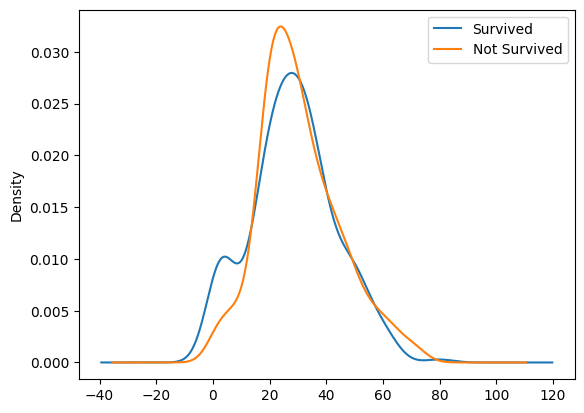

In [48]:
df[df['Survived'] == 1]['Age'].plot(kind="kde", label="Survived")
df[df['Survived'] == 0]['Age'].plot(kind="kde", label="Not Survived")
plt.legend()
plt.show()

### Feature Engineering

In [49]:
df[df["SibSp"] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


Now, see each member has sibsp = 8 and parch = 2 which means 10 other members additional to this member. So total 11 people should be one group here. 

But the df shows only 7 people, so other 4 missing?

They may be in the test dataset!!!

In [51]:
df['individual_fare'] = df['Fare']/(df["SibSp"] + df["Parch"] + 1)

In [52]:
df["individual_fare"].describe()

count    891.000000
mean      19.916375
std       35.841257
min        0.000000
25%        7.250000
50%        8.300000
75%       23.666667
max      512.329200
Name: individual_fare, dtype: float64

In [ ]:
df["family_size"] = df["Sibsp"] + df["Parch"] + 1 

In [ ]:
# pd.crosstab(df["Survived"], df["family_type"], normalize="columns")